In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
from reedsolo import ReedSolomonError

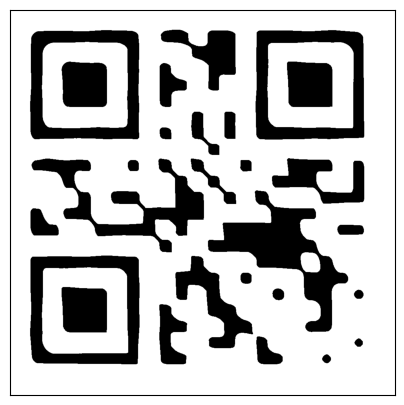

In [2]:
def sharpen_img(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    return cv2.filter2D(image, -1, kernel)

def add_quiet_zone(image, border_size=10):

    return cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=[255, 255, 255])

img = cv2.imread("09-My-phone-fell-while-taking-this-one-...-or-did-it.png", cv2.IMREAD_GRAYSCALE)
#img = 255 - img
_, img_thresh = cv2.threshold(img, 53, 255, cv2.THRESH_BINARY)
img_sharpened = sharpen_img(img_thresh)
edges = cv2.Canny(img_sharpened, 100, 200)
img_combined = cv2.bitwise_or(img_sharpened, edges)
img_final = add_quiet_zone(img_combined, 20)

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img_final, cmap='gray');

In [3]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img_final):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img_final[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img_final.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img_final)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img_final)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col =img_final.shape[1] - col_index
            break
    if end_col != -1:
        break

print(start_row, end_row, start_col, end_col)

54 968 55 968


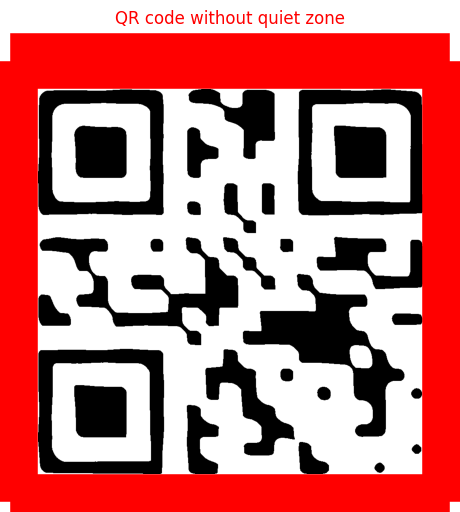

In [4]:
qr_no_quiet_zone = img_final[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

In [5]:
size = 0
for pixel in qr_no_quiet_zone[0]:
    if (pixel != 0): break
    size += 1

if qr_no_quiet_zone.ndim == 3 and qr_no_quiet_zone.shape[2] == 3:  # Check for three channels
    # Convert to grayscale using typical perception weights
    qr_no_quiet_zone = np.dot(qr_no_quiet_zone[...,:3], [0.2989, 0.5870, 0.1140])
    print("Converted to grayscale.")

size = 0
for pixel in qr_no_quiet_zone[0, :]:  # Assuming scanning the first row
    if pixel > 0:
        break
    size += 1

print(f'size: {size}')

grid_cell_size = round(size/7)
print(f'grid cell size: {grid_cell_size}')

grid_cells_num = round(qr_no_quiet_zone.shape[0]/grid_cell_size)
print(f'grid cell num: {grid_cells_num}')

print(f'shape: {qr_no_quiet_zone.shape}')

total_dimension_check = grid_cell_size * grid_cells_num
print("Total dimension calculated:", total_dimension_check)

try:
    qr_cells = qr_no_quiet_zone.reshape(
        (grid_cells_num, grid_cell_size, grid_cells_num, grid_cell_size)
    ).swapaxes(1, 2)
    print("Reshape successful, QR cells shape:", qr_cells.shape)
except ValueError as e:
    print("Reshape failed:", e)

# Additional diagnostics:
if qr_no_quiet_zone.shape[0] != total_dimension_check:
    print("Mismatch in expected dimensions and actual dimensions. Need to adjust grid cell size or handling.")

# qr_cells = qr_no_quiet_zone.reshape((
#     grid_cells_num,
#     grid_cell_size,
#     grid_cells_num,
#     grid_cell_size,
# )).swapaxes(1, 2)
# print(f'qr cells: {qr_cells.shape}')

qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(f'qr cells numeric:\n {qr_cells_numeric}')


size: 0
grid cell size: 0


ZeroDivisionError: division by zero